# Acquire and Prep

In the following lessons, we will walk through the data science pipeline using the following example:

I am a university teacher, and I want to know when to worry about a student's progress.  I want to be able to work with any students who are a high risk of failing the class, so that I can try to prevent that from happening.  I have the grades of the three exams and the final grade from last semester's class.  I am hoping I can build a prediction model that would be able to use those exams to predict the final grade +/- 5 points per student.

#### When we say "wrangle," we are referring to a combination of two steps of the pipeline that we are now familiarized with: Acquisition and Preparation.  Wrangling is the act of obtaining our data and ensuring that it is ready for analysis and modeling.

In [1]:
# get our imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Acquire the Data

In [3]:
# read in our csv
df = pd.read_csv('/Users/madeleinecapper/Documents/data/easley/student_grades.csv')

### Sample and summarize

In [4]:
# shape
df.shape

(104, 5)

In [6]:
# df.head()
df.head(10)

,student_id,exam1,exam2,exam3,final_grade
0,1,100.0,90,95,96
1,2,98.0,93,96,95
2,3,85.0,83,87,87
3,4,83.0,80,86,85
4,5,93.0,90,96,97
5,6,79.0,70,85,81
6,7,92.0,89,94,93
7,8,73.0,70,75,76
8,9,70.0,65,78,77
9,10,NaN,70,79,70


In [7]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   student_id   104 non-null    int64  
 1   exam1        103 non-null    float64
 2   exam2        104 non-null    int64  
 3   exam3        104 non-null    object 
 4   final_grade  104 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 4.2+ KB


In [8]:
# immediate takeaways:
#  1) We know that we have one null value in exam1, that we have alredy located
#  2) exam3 is an object and we will want to convert that to a numerical data type

In [9]:
# look at the distrubution of numerical variables
#  !! Note: exam3 does not populate here yet as it is currently formatted as an object
df.describe()

,student_id,exam1,exam2,final_grade
count,104.000000,103.000000,104.000000,104.000000
mean,52.500000,78.621359,77.307692,81.692308
std,30.166206,14.260955,10.295703,10.918122
min,1.000000,57.000000,65.000000,65.000000
25%,26.750000,70.000000,70.000000,72.000000
50%,52.500000,79.000000,75.000000,81.000000
75%,78.250000,92.000000,89.000000,93.000000
max,104.000000,100.000000,93.000000,97.000000


In [10]:
# let's look at exam3 value counts to see where there might be something that does not intuitively look like a number
df.exam3.value_counts()

96    16
78    16
75    15
94     8
95     8
70     8
87     8
86     8
85     8
79     8
       1
Name: exam3, dtype: int64

In [ ]:
# Looks like we have one instance of a blank cell, so just converting the Seires to a numtype is not going to fix our problem

In [11]:
# sanity check to make sure that the "empty" cell is whitespace, not a null value
df.exam3.isnull().sum()

0

In [12]:
# look at our grades to see how we might impute the value
df.head()

,student_id,exam1,exam2,exam3,final_grade
0,1,100.0,90,95,96
1,2,98.0,93,96,95
2,3,85.0,83,87,87
3,4,83.0,80,86,85
4,5,93.0,90,96,97


In [76]:
int(df[0:1].exam1)

100

In [77]:
# manual calculation of the exam1 grade based on final, exam3 and exam1 versus actual exam1 value
(96 * 3 -95 -90) == int(df[0:1].exam1)

False

In [14]:
# this method works if we have all numberical data types and would add a column for comparison outside of one value
# df['mock_exam1'] = (df.final_grade*3) - (df.exam3 + df.exam2)

In [16]:
# replace the whitespace in exam3:
# we will use some regex here
# regex primer:
# ^ : start of characters
# \s: space character
# *: for any number (i.e, any number of whitepsace characters in this case)
#  $: end of the characters
# regex translation: replace any string of whitespace as long as it is strictly whitespace from the begging to end
# replace it with a np.nan so we can just catch it with df.dropna()
df['exam3'] = df['exam3'].replace(r'^\s*$', np.nan, regex=True)

In [17]:
# check that we turned the space into a null:
df.exam3.isnull().sum()

1

In [18]:
# Because we have evidence that there are missing grades in this dataframe, 
# we will not impute the values and drop the two rows that involve missing grades
df = df.dropna()

In [19]:
# sanity check, establish we dropped two null-inclusive rows, dropping our shape to 102 rows.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 0 to 103
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   student_id   102 non-null    int64  
 1   exam1        102 non-null    float64
 2   exam2        102 non-null    int64  
 3   exam3        102 non-null    object 
 4   final_grade  102 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 4.8+ KB


In [20]:
# if exam3 consists of all whole numbers, we will convert it to an integer type.  Otherwise we will utilize float.
df.exam3.value_counts()

96    16
78    16
75    15
94     8
95     8
70     8
87     8
86     8
85     8
79     7
Name: exam3, dtype: int64

In [21]:
# reassign exam3 to integer type
df['exam3'] = df['exam3'].astype('int')

<ipython-input-21-67e4edb7e7fa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['exam3'] = df['exam3'].astype('int')


In [22]:
# exam1 is already a float.  Let's observe if we have any decimals or we can also make it an integer
df['exam1'].value_counts()

70.0     16
58.0      8
73.0      8
92.0      8
79.0      8
93.0      8
83.0      8
85.0      8
98.0      8
100.0     8
57.0      7
62.0      7
Name: exam1, dtype: int64

In [23]:
df['exam1'] = df.exam1.astype('int')

<ipython-input-23-d9604ee24ce9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['exam1'] = df.exam1.astype('int')


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 0 to 103
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   student_id   102 non-null    int64
 1   exam1        102 non-null    int64
 2   exam2        102 non-null    int64
 3   exam3        102 non-null    int64
 4   final_grade  102 non-null    int64
dtypes: int64(5)
memory usage: 4.8 KB


In [25]:
df.head()

,student_id,exam1,exam2,exam3,final_grade
0,1,100,90,95,96
1,2,98,93,96,95
2,3,85,83,87,87
3,4,83,80,86,85
4,5,93,90,96,97


In [26]:
df.tail()

,student_id,exam1,exam2,exam3,final_grade
99,100,70,65,78,77
100,101,62,70,79,70
101,102,58,65,70,68
102,103,57,65,75,65
103,104,70,75,78,72


In [27]:
# drop student_id as it is an arbitary value in our use-case
df = df.drop(columns='student_id')

In [29]:
# plt.Figure(figsize=15,4)
for i, val in enumerate(list(df.columns)):
    print(i)
    print(val)

0
exam1
1
exam2
2
exam3
3
final_grade


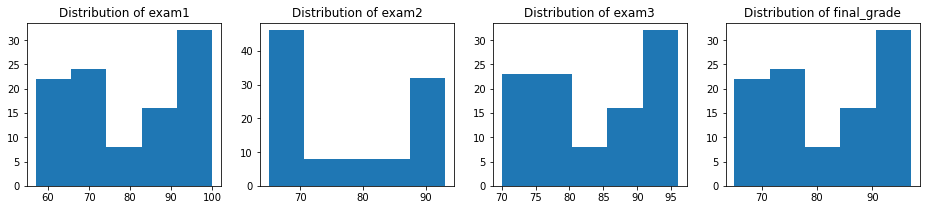

In [85]:
# plot distributions
# Fix form live lesson: plt.figure, not plt.Figure!
plt.figure(figsize=(16, 3))
for i, val in enumerate(list(df.columns)):
    plotnum = i + 1
    plt.subplot(1,4,plotnum)
    plt.title(f'Distribution of {val}')
    plt.hist(df[val], bins=5)

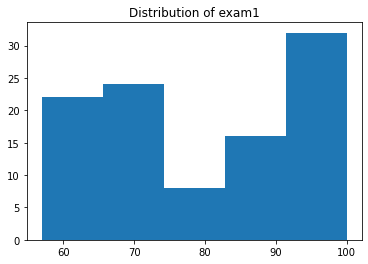

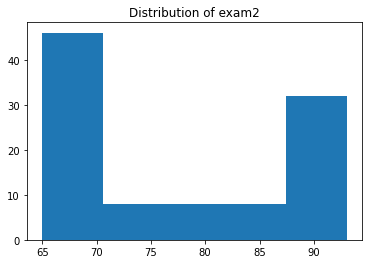

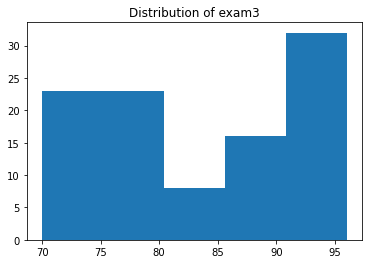

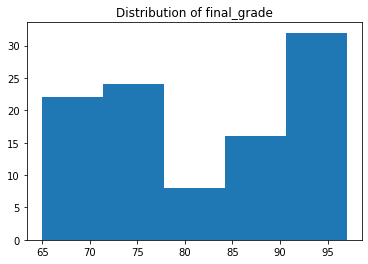

In [36]:
for i, val in enumerate(list(df.columns)):
    plotnum = i + 1
#     plt.subplot(4,1,plotnum)
    plt.title(f'Distribution of {val}')
    plt.hist(df[val], bins=5)
    plt.show()

<AxesSubplot:>

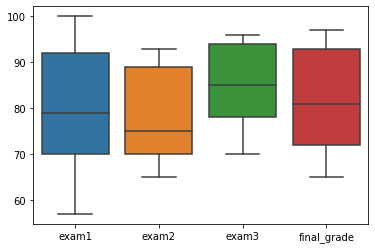

In [37]:
# boxplot
sns.boxplot(data=df)

In [38]:
from sklearn.model_selection import train_test_split

In [ ]:
# train test split

In [39]:
train_val, test = train_test_split(df, train_size=0.8, random_state=1349)

In [40]:
train, validate = train_test_split(train_val, train_size=0.7, random_state=1349)

In [42]:
# observe size of train
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 0 to 3
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   exam1        56 non-null     int64
 1   exam2        56 non-null     int64
 2   exam3        56 non-null     int64
 3   final_grade  56 non-null     int64
dtypes: int64(4)
memory usage: 2.2 KB


In [62]:
# Let's translate our work into reproducable functions

def acquire_grades():
    '''
    Grab our data from a path, read in from csv
    '''
    df = pd.read_csv('/Users/madeleinecapper/Documents/data/easley/student_grades.csv')
    return df

def clean_grades(df):
    '''
    Takes in a df of student exam grades and cleans the data appropriately by dropping null values,
    replacing whitespace,
    and converting data to numerical data types
    as well as dropping student_id column from the dataframe
    
    return: df, a cleaned pandas dataframe
    '''
    df['exam3'] = df['exam3'].replace(r'^\s*$', np.nan, regex=True)
    df = df.dropna()
    df['exam3'] = df['exam3'].astype('int')
    df['exam1'] = df['exam1'].astype('int')
    df = df.drop(columns='student_id')
    return df

def split_data(df):
    '''
    split our data,
    takes in a pandas dataframe
    returns: three pandas dataframes, train, test, and validate
    '''
    train_val, test = train_test_split(df, train_size=0.8, random_state=1349, stratify=df.final_grade)
    train, validate = train_test_split(train_val, train_size=0.7, random_state=1349, stratify=train_val.final_grade)
    return train, validate, test

In [63]:
# wrangle!
def wrangle_grades():
    '''
    wrangle_grades will read in our student grades as a pandas dataframe,
    clean the data
    split the data
    return: train, validate, test sets of pandas dataframes from student grades, stratified on final_grade
    '''
    df = clean_grades(acquire_grades())
    return split_data(df)

In [64]:
# test our function
train1, val1, test1 = wrangle_grades()

<ipython-input-62-e580f410bdad>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['exam3'] = df['exam3'].astype('int')
<ipython-input-62-e580f410bdad>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['exam1'] = df['exam1'].astype('int')


In [65]:
train1.head()

,exam1,exam2,exam3,final_grade
55,83,80,86,85
0,100,90,95,96
39,100,90,95,96
20,73,70,75,76
59,73,70,75,76


In [66]:
train1.shape

(56, 4)

In [67]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 55 to 12
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   exam1        56 non-null     int64
 1   exam2        56 non-null     int64
 2   exam3        56 non-null     int64
 3   final_grade  56 non-null     int64
dtypes: int64(4)
memory usage: 2.2 KB


In [ ]:
# question exploration: what happens when we resassign a dataframe versus using the inplace kwarg:

In [52]:
# copy the dataframe as it was
df2 = df.copy()

In [53]:
df2.head()

,exam1,exam2,exam3,final_grade
0,100,90,95,96
1,98,93,96,95
2,85,83,87,87
3,83,80,86,85
4,93,90,96,97


In [54]:
thisvar = df2.drop(columns='exam1')

In [55]:
df2.head()

,exam1,exam2,exam3,final_grade
0,100,90,95,96
1,98,93,96,95
2,85,83,87,87
3,83,80,86,85
4,93,90,96,97


In [56]:
type(thisvar)

pandas.core.frame.DataFrame

In [54]:
thisvar = df2.drop(columns='exam1')

In [55]:
df2.head()

,exam1,exam2,exam3,final_grade
0,100,90,95,96
1,98,93,96,95
2,85,83,87,87
3,83,80,86,85
4,93,90,96,97


In [56]:
type(thisvar)

pandas.core.frame.DataFrame

In [86]:
thisvar = df2.drop(columns='exam1', inplace=True)

In [87]:
df2.head()

,exam2,exam3,final_grade
0,90,95,96
1,93,96,95
2,83,87,87
3,80,86,85
4,90,96,97


In [88]:
type(thisvar)

NoneType